# AML Group Project

### Data consists of 72 samples: 44 standard risks and 28 low risk patients. Data consists of 471 genes across all samples.

## 1. Read Data & Display Data

In [114]:
aml.data <- read.table("clinical_9A_standard_low_risk_sd3.txt", sep="\t", header=TRUE)

# aml.data

## 2. Seprate Data

In [24]:
stand.data <- aml.data[1:44, ] # standard risks
low.data <- aml.data[45:72, ]  # low risks

# stand.data
# low.data

# dim(stand.data)
# dim(low.data)

## 3. Exploring Data

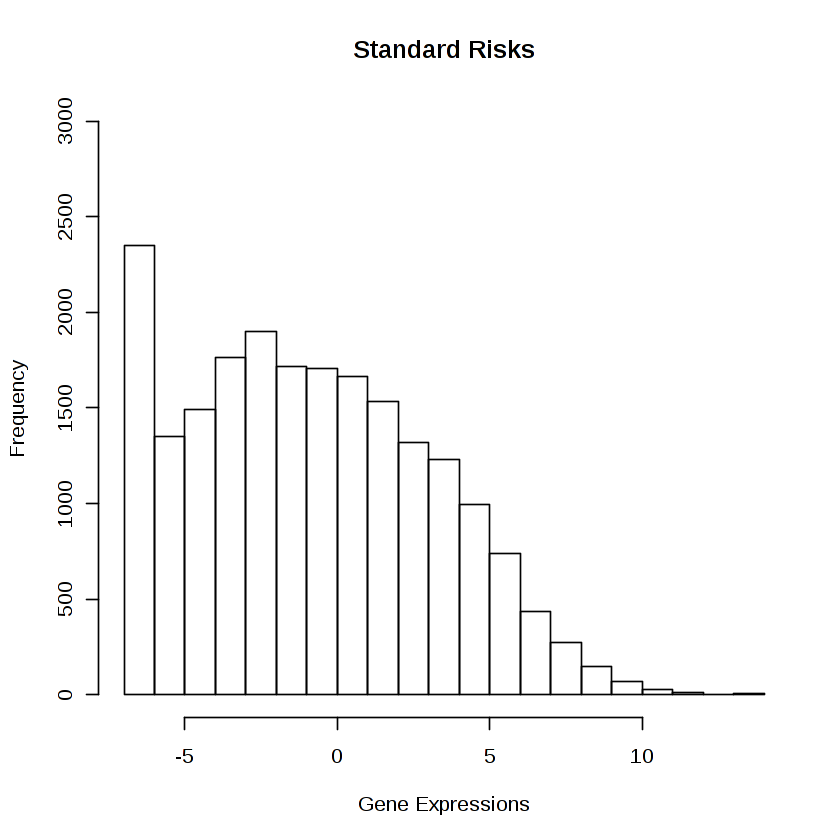

In [21]:
# Graph standard risks
hist(as.numeric(unlist(stand.data)), main="Standard Risks", xlab="Gene Expressions", ylim=c(0,3000))

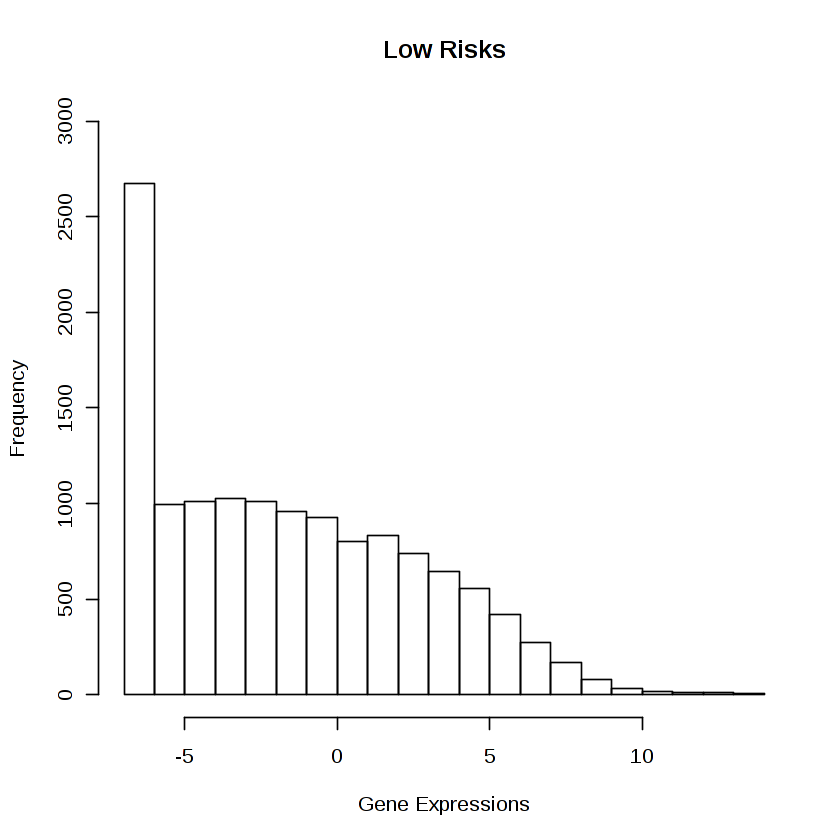

In [23]:
# Graph low risks
hist(as.numeric(unlist(low.data)), main="Low Risks", xlab="Gene Expressions", ylim=c(0,3000))

### Averaging Standard Risks for 471 Genes

In [112]:
ave.standard <- apply(stand.data, 2, 
                function (x) {
                    sum(x) / 44
                })
# ave.standard

# checking function
# mean(as.numeric(stand.data[,1]))

### Averaging Low Risks for 471 Genes

In [113]:
ave.low <- apply(stand.data, 2, 
                function (x) {
                    sum(x) / 28
                })
# ave.low

## 4. Apply T-Test to Standard & Low Risks to all 471 Genes

In [111]:
# apply above t-test to standard risk 
# and to low risk patients to all 471 genes
pvalue.vec <- apply (aml.data, 2, function (x){ t.test(x[1:44], x[45:72])$p.value})

# pvalue.vec

# get indexes where p-value is less than 0.1%
indexes <- which(pvalue.vec < 0.001)

## 5. Get Data Subsets for the Differentially Expressed Genes

In [107]:
subStand.data <- aml.data[1:44, indexes] # subset of standard risks
subLow.data <- aml.data[45:72, indexes]  # subset of low risks

# subStand.data
# subLow.data

## 6. Averages for Differentially Expressed Standard Risks vs. Low Risks

In [110]:
diffAve.standard <- apply(subStand.data, 2, 
                    function (x) {
                        sum(x) / 44
                    })

# diffAve.standard

In [109]:
diffAve.low <- apply(subLow.data, 2,
                    function (x) {
                        sum(x) / 28
                    })

# diffAve.low

### Plotting Averages of Standard Risks vs. Low Risks

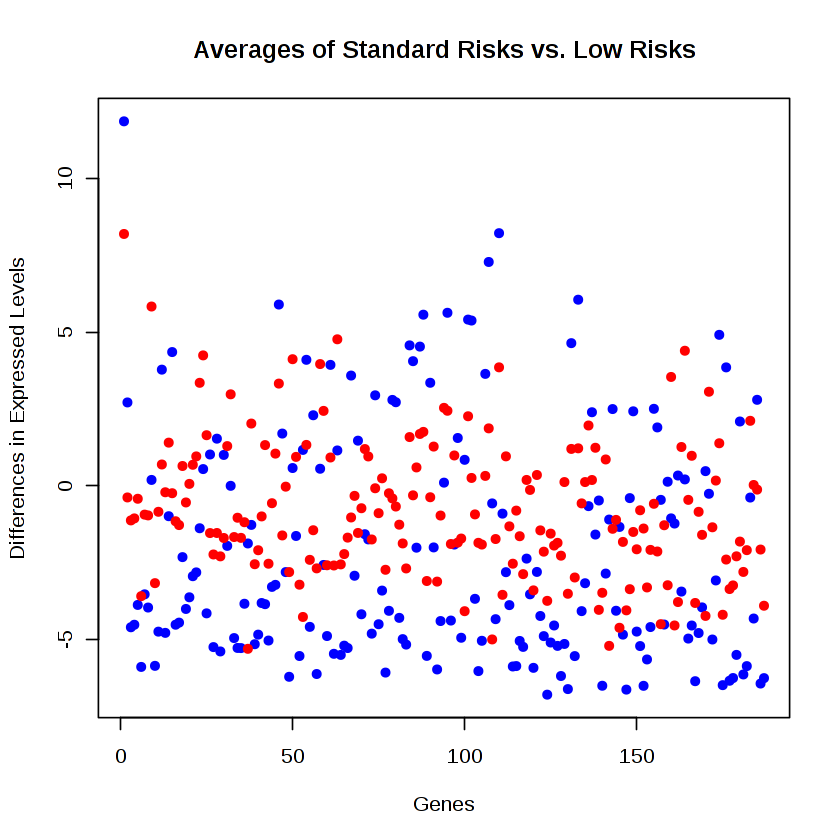

In [86]:
# BLUE = LOW RISKS
# RED = STANDARD RISKS

plot(diffAve.low, pch=16, col = "blue", 
     main = "Averages of Standard Risks vs. Low Risks",
     xlab = "Genes", ylab = "Differences in Expressed Levels")

points(diffAve.standard, pch=16, col="red")

## 7. Filtering the Data

### Differences between Averages

In [104]:
diffStandLow <- abs(diffAve.standard - diffAve.low)

# length(diffStandLow)

### Selects genes that have differences in expression levels above 3.5

In [108]:
dfFinal <- diffStandLow[which(diffStandLow > 3.5)]

# dfFinal

length(dfFinal)

[1] 64

### After this step, we've narrowed down from 471 genes to 64 genes that should be examined to determine whether a person is in the standard risks or the low risks category.

### We can further calculate the average of the difference. This calculated value then can be the threshold to determine which category of risks one belongs to.

In [106]:
mean(dfFinal)

[1] 4.292721

### The mean is 4.2927. This means if a person's genes expression levels when compared to the averages of standard risks individuals is equal or higher than 4.2927, then that person would fall into the low risk category. Else, the gene expression levels are similar, so the individual would be in the standard risks category.